In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
sys.path.append('../utils')

In [3]:
from speakers_ptBR import params
speakers = params.speakers

In [7]:
s1 = np.load('speaker_embeddings_DS_ptBR_v4_modified.npy').astype(np.float32)
s2 = np.load('speaker_embeddings_ge2e_ptBR_t06_modified.npy').astype(np.float32)
s3 = np.load('speaker_embeddings_DS_ptBR_v4_further_training_modified.npy').astype(np.float32)
s4 = np.load('speaker_embeddings_ge2e_ptBR_t07_modified.npy').astype(np.float32)
emp1=np.where(np.sum(s1,axis=1)==0)
emp2=np.where(np.sum(s2,axis=1)==0)
emp3=np.where(np.sum(s3,axis=1)==0)
emp4=np.where(np.sum(s4,axis=1)==0)
print(f'Empty rows in s1: {emp1}')
print(f'Empty rows in s2: {emp2}')
print(f'Empty rows in s3: {emp3}')
print(f'Empty rows in s4: {emp4}')
print(s1.shape,s2.shape,s3.shape,s4.shape)

Empty rows in s1: (array([ 75,  78,  81,  87,  88,  93,  95,  96,  97, 104, 108, 112, 125,
       139]),)
Empty rows in s2: (array([ 75,  81,  87,  95,  96,  97, 104, 108, 112, 125]),)
Empty rows in s3: (array([ 75,  78,  81,  87,  88,  93,  95,  96,  97, 104, 108, 112, 125,
       139]),)
Empty rows in s4: (array([ 75,  78,  81,  87,  88,  93,  95,  96,  97, 104, 108, 112, 125,
       139]),)
(140, 64) (140, 64) (140, 64) (140, 64)


In [8]:
X1 = TSNE(n_components=2,perplexity=5,learning_rate=100.,init='pca').fit_transform(s1)
X2 = TSNE(n_components=2,perplexity=5,learning_rate=100.,init='pca').fit_transform(s2)
X3 = TSNE(n_components=2,perplexity=5,learning_rate=100.,init='pca').fit_transform(s3)
X4 = TSNE(n_components=2,perplexity=5,learning_rate=100.,init='pca').fit_transform(s4)
print(X1.shape, X2.shape, X3.shape, X4.shape)

(140, 2) (140, 2) (140, 2) (140, 2)


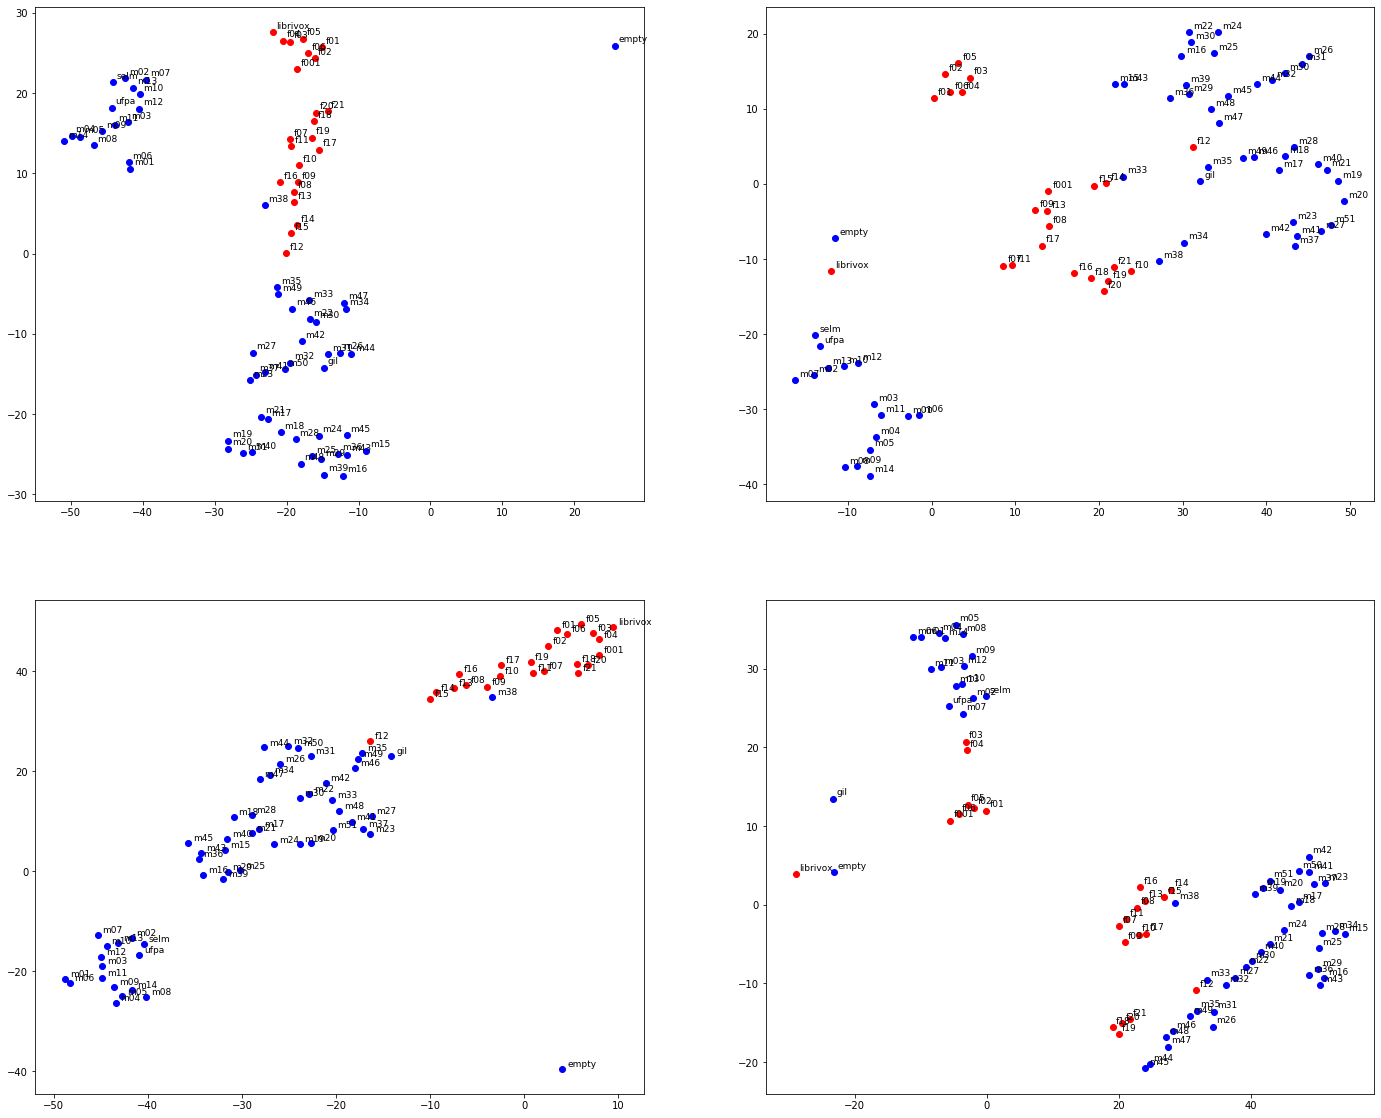

In [17]:
fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(221)
delta = 0.5
for s, i, g in speakers:
    if g == 1:
        c = 'r'
    else:
        c = 'b'
    ax.scatter(X1[i, 0], X1[i, 1], color=c)
    ax.text(X1[i, 0]+delta, X1[i, 1]+delta, s, fontsize=9)
ax = fig.add_subplot(222)
for s, i, g in speakers:
    if g == 1:
        c = 'r'
    else:
        c = 'b'
    ax.scatter(X2[i, 0], X2[i, 1], color=c)
    ax.text(X2[i, 0]+delta, X2[i, 1]+delta, s, fontsize=9)
ax = fig.add_subplot(223)
for s, i, g in speakers:
    if g == 1:
        c = 'r'
    else:
        c = 'b'
    ax.scatter(X3[i, 0], X3[i, 1], color=c)
    ax.text(X3[i, 0]+delta, X3[i, 1]+delta, s, fontsize=9)
ax = fig.add_subplot(224)
for s, i, g in speakers:
    if g == 1:
        c = 'r'
    else:
        c = 'b'
    ax.scatter(X4[i, 0], X4[i, 1], color=c)
    ax.text(X4[i, 0]+delta, X4[i, 1]+delta, s, fontsize=9)
plt.show()

In [14]:
import seaborn as sn
import pandas as pd

def plot_heatmap(scores, lspeakers, title=None):
    nspeakers = len(scores)
    df_cm = pd.DataFrame(scores, range(nspeakers), range(nspeakers))
    sn.set(font_scale=0.1) # for label size
    sn.heatmap(
        df_cm,
        vmin=-1,
        vmax=1,
        annot=True,
        annot_kws={"size": 1},
        linewidths=.1,
        xticklabels=lspeakers,
        yticklabels=lspeakers) # font size
    plt.xlabel('speaker')
    plt.title(title)
    plt.ylabel('speaker')
    plt.tight_layout()
    plt.show()

def plot_imshow(scores, title=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    im = ax.imshow(
        scores,
        aspect='auto',
        origin='lower',
        interpolation='none')
    fig.colorbar(im, ax=ax)
    plt.xlabel('speaker')
    plt.title(title)
    plt.ylabel('speaker')
    plt.tight_layout()
    plt.show()

In [15]:
C1 = np.load('scores_DS_v4.npy').astype(np.float32)
C2 = np.load('scores_DS_v4_further_training.npy').astype(np.float32)
C3 = np.load('scores_GE2E_t06.npy').astype(np.float32)
C4 = np.load('scores_GE2E_t07.npy').astype(np.float32)

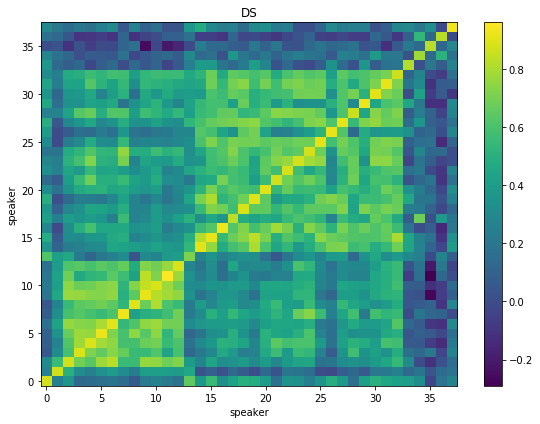

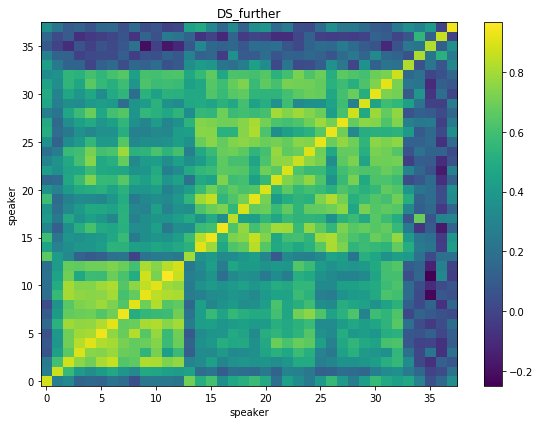

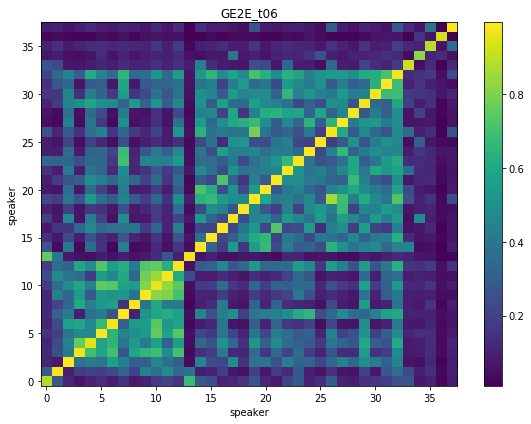

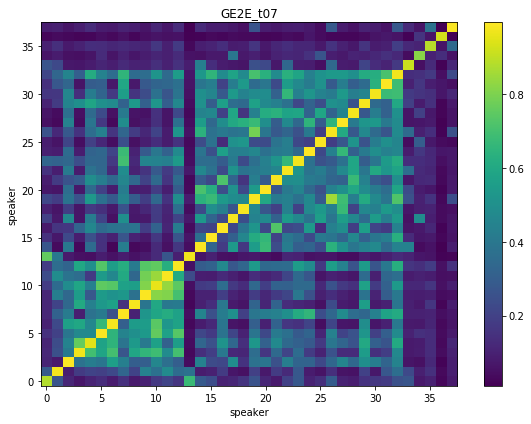

In [16]:
plot_imshow(C1, title='DS')
plot_imshow(C2, title='DS_further')
plot_imshow(C3, title='GE2E_t06')
plot_imshow(C3, title='GE2E_t07')